In [1]:
import numpy as np

a = np.arange(9).reshape((3, 3))
print(a)

np.where(a < 5)
list(zip(*np.where(a < 4)))


[[0 1 2]
 [3 4 5]
 [6 7 8]]


(array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [5]:
import pytplot, pyspedas
from pytplot import tplot
times = np.arange(10)
data = np.arange(0,10, 2)
data, times
pytplot.store_data('tinterpol_test', data = {'x': times, 'y': times})
pytplot.store_data('tinterpol_test1', data = {'x': data, 'y': data})
pytplot.tplot_names()

0 : tinterpol_test
1 : tinterpol_test1
2 : tinterpol_test1-itrp


['tinterpol_test', 'tinterpol_test1', 'tinterpol_test1-itrp']

In [6]:
pyspedas.tinterpol('tinterpol_test1', interp_to='tinterpol_test')

tinterpol (linear) was applied to: tinterpol_test1-itrp


In [10]:
x = pytplot.get_data('tinterpol_test')
y = pytplot.get_data('tinterpol_test1-itrp')
z = pytplot.get_data('tinterpol_test1')

In [11]:
x,y,z

(variable(times=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), y=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 variable(times=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), y=array([ 0.,  1.,  2.,  3.,  4., nan, nan, nan, nan, nan])),
 variable(times=array([0, 1, 2, 3, 4]), y=array([0, 1, 2, 3, 4])))

In [1]:
import load 


In [8]:
importer = load.orb(trange=['1999-12-31', '2000-01-02'])

ParserError: Unknown string format: 2000/10/00/00:0:

In [3]:
import pytplot
pytplot.tplot_names()

0 : akb_orb_ILAT
1 : akb_orb_MLAT
2 : akb_orb_MLT
3 : akb_orb_ALT


['akb_orb_ILAT', 'akb_orb_MLAT', 'akb_orb_MLT', 'akb_orb_ALT']

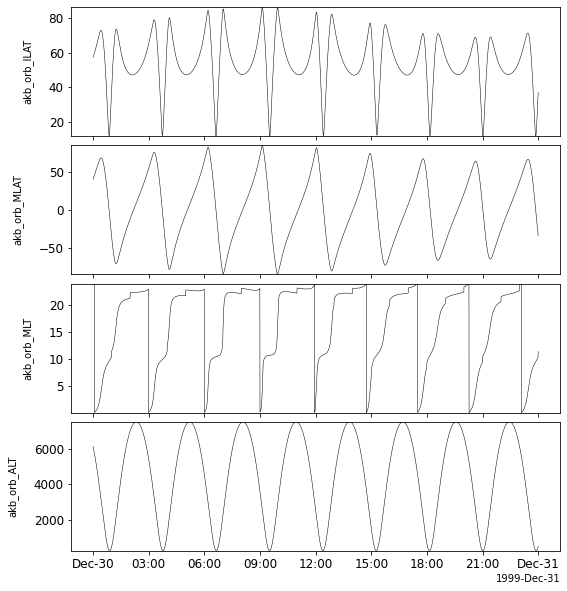

In [7]:
pytplot.tplot(['akb_orb_ILAT', 'akb_orb_MLAT', 'akb_orb_MLT', 'akb_orb_ALT'])

In [11]:
import Akebono_orb_load

importer = Akebono_orb_load.Akebono_orb_load('20000101')
importer.orb()

ParserError: Unknown string format: 2010/10/00/00:0:

In [32]:
import load
import pytplot
import numpy as np
from pytplot import options
load.mca(trange=['1991-07-11', '1991-07-17'])

tplot_names = pytplot.tplot_names(True)
for i in range(4):
    tplot_variable = pytplot.get_data(tplot_names[i])
    tplot_variable_0dB = 1e-6 #mV or pT
    bandwidth = tplot_variable.v * 0.3
    tplot_variable_amplitude = (10**(tplot_variable.y/20)) * (tplot_variable_0dB)  / np.sqrt(bandwidth)
    pytplot.store_data(tplot_names[i] +'_amplitude', data={'x': tplot_variable.times, 'y': tplot_variable_amplitude, 'v': tplot_variable.v})

pytplot.tplot_names()

Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
0 : Emax
1 : Eave
2 : Bmax
3 : Bave
4 : PostGap
5 : Emax_power
6 : Eave_power
7 : Bmax_power
8 : Bave_power
9 : Emax_amplitude
10 : Eave_amplitude
11 : Bmax_amplitude
12 : Bave_amplitude


['Emax',
 'Eave',
 'Bmax',
 'Bave',
 'PostGap',
 'Emax_power',
 'Eave_power',
 'Bmax_power',
 'Bave_power',
 'Emax_amplitude',
 'Eave_amplitude',
 'Bmax_amplitude',
 'Bave_amplitude']

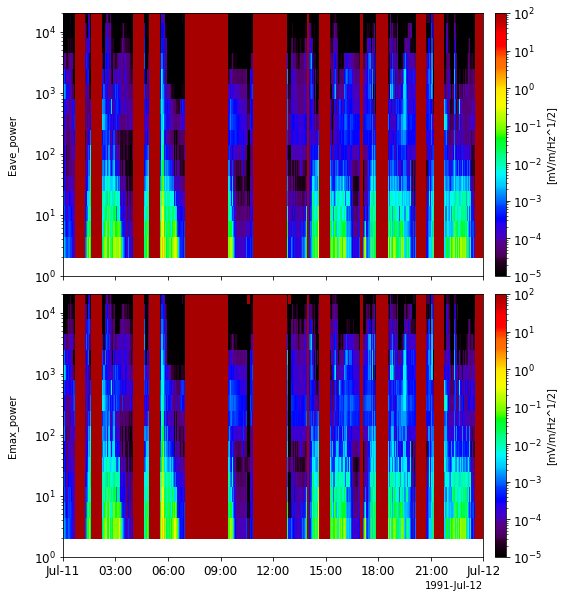

In [9]:
options(['Eave_power', 'Emax_power'], 'spec', 1)
options(['Eave_power', 'Emax_power'], 'ylog', 1)
options(['Eave_power', 'Emax_power'], 'zlog', 1)
options(['Eave_power', 'Emax_power'], 'zrange', [1e-5, 100])
options(['Eave_power', 'Emax_power'], 'yrange', [1, 2e4])
options(['Eave_power', 'Emax_power'], 'ztitle', '[mV/m/Hz^1/2]')
pytplot.tplot(['Eave_power', 'Emax_power'])

07-Jul-22 07:31:13: <>:28: DeprecationWarning: invalid escape sequence \s

07-Jul-22 07:31:13: <>:28: DeprecationWarning: invalid escape sequence \s

07-Jul-22 07:31:13: <ipython-input-38-09691759de28>:28: DeprecationWarning: invalid escape sequence \s
  plt.xlabel('E amplitude $[mV/m/\sqrt{Hz}]$')



Text(0, 0.5, '')

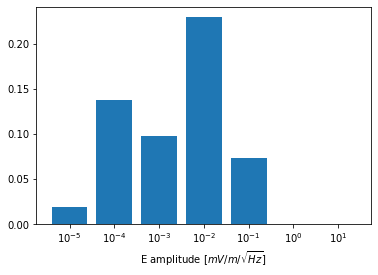

In [38]:
Emax = pytplot.get_data('Emax_amplitude')
Emax_T = Emax.y.T
Emax_1ch = Emax_T[0]
Emax_25dB = (10**(253/20)) * (1e-6)  / np.sqrt(3.16*0.3)

left = np.arange(7)
Emax_amp_0 = Emax_1ch.size
Emax_amp_1 = Emax_1ch[Emax_1ch < 1e1].size 
Emax_amp_2 = Emax_1ch[Emax_1ch < 1].size
Emax_amp_3 = Emax_1ch[Emax_1ch < 1e-1].size
Emax_amp_4 = Emax_1ch[Emax_1ch < 1e-2].size
Emax_amp_5 = Emax_1ch[Emax_1ch < 1e-3].size
Emax_amp_6 = Emax_1ch[Emax_1ch < 1e-4].size
Emax_amp_25dB = Emax_1ch[Emax_1ch > Emax_25dB].size
Emax_seconds = np.array([Emax_amp_6/Emax_amp_0,
               (Emax_amp_5-Emax_amp_6)/Emax_amp_0, 
               (Emax_amp_4-Emax_amp_5)/Emax_amp_0, 
               (Emax_amp_3-Emax_amp_4)/Emax_amp_0, 
               (Emax_amp_2-Emax_amp_3)/Emax_amp_0, 
               (Emax_amp_1-Emax_amp_2)/Emax_amp_0,
               (Emax_amp_0-Emax_amp_1-Emax_amp_25dB)/Emax_amp_0])


import matplotlib.pyplot as plt
labels = ['$10^{-5}$', '$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^0$','$10^1$']
plt.figure()
plt.bar(left, Emax_seconds, tick_label = labels)
plt.xlabel('E amplitude $[mV/m/\sqrt{Hz}]$')
plt.ylabel('')